In [1]:
!git clone https://github.com/sharika-anjum/yolo-license-plate-detection.git    #cloning the repository
%cd yolo-license-plate-detection  

Cloning into 'yolo-license-plate-detection'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 83 (delta 32), reused 8 (delta 4), pack-reused 0
Unpacking objects: 100% (83/83), done.
/content/yolo-license-plate-detection


In [2]:
!gdown https://drive.google.com/uc?id=1vXjIoRWY0aIpYfhj3TnPUGdmJoHnWaOc     #weight file link

Downloading...
From: https://drive.google.com/uc?id=1vXjIoRWY0aIpYfhj3TnPUGdmJoHnWaOc
To: /content/yolo-license-plate-detection/model.weights
245MB [00:02, 93.4MB/s]


In [3]:
#for detection
import cv2
import numpy as np

def objectDetector(img):
    yolo = cv2.dnn.readNet("model.weights", "darknet-yolov3.cfg") #reading the weight and config file for creating the network
    classes = []

    with open("classes.names", "r") as file: #has class of the pic it is trained on
        classes = [line.strip() for line in file.readlines()] 
    layer_names = yolo.getLayerNames()
    output_layers = [layer_names[i[0] - 1] for i in yolo.getUnconnectedOutLayers()]  #stack overflow https://stackoverflow.com/questions/57706412/what-is-the-working-and-output-of-getlayernames-and-getunconnecteddoutlayers

    Red = (0,0,255)

    height, width, channels = img.shape

    # # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.004, (416, 416), (0, 0, 0), True, crop=False)

    yolo.setInput(blob)
    outputs = yolo.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.4: #considering the confidence score that are more than 40%
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            cv2.rectangle(img, (x, y), (x + w, y + h), Red, 3)
            
    return img

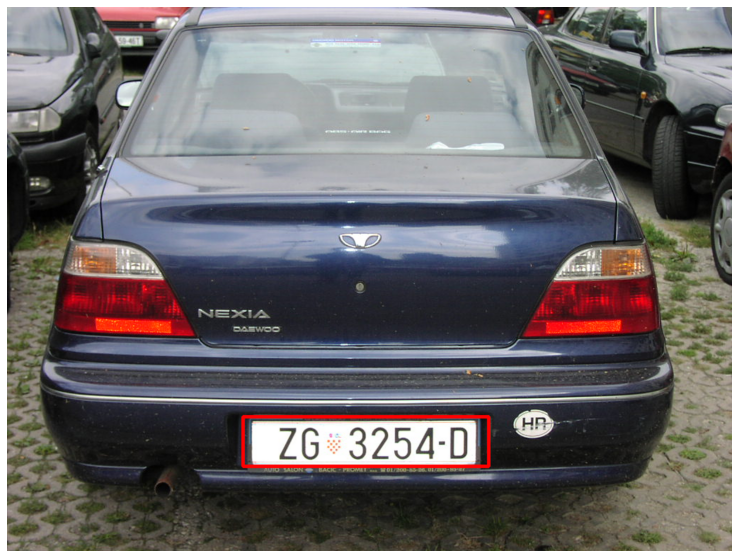

In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

input_image = cv2.imread("car0.JPG")
image = objectDetector(input_image)
height, width = image.shape[:2]
resized_image = cv2.resize(image,(5*width, 5*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

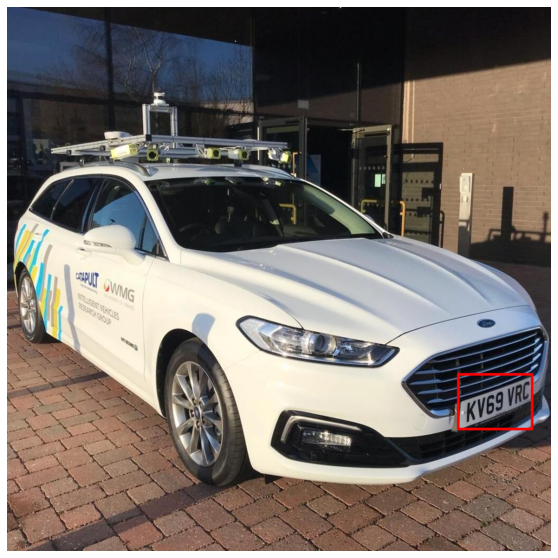

In [5]:
input_image = cv2.imread("car1.jpg")
image = objectDetector(input_image)
height, width = image.shape[:2]
resized_image = cv2.resize(image,(5*width, 5*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

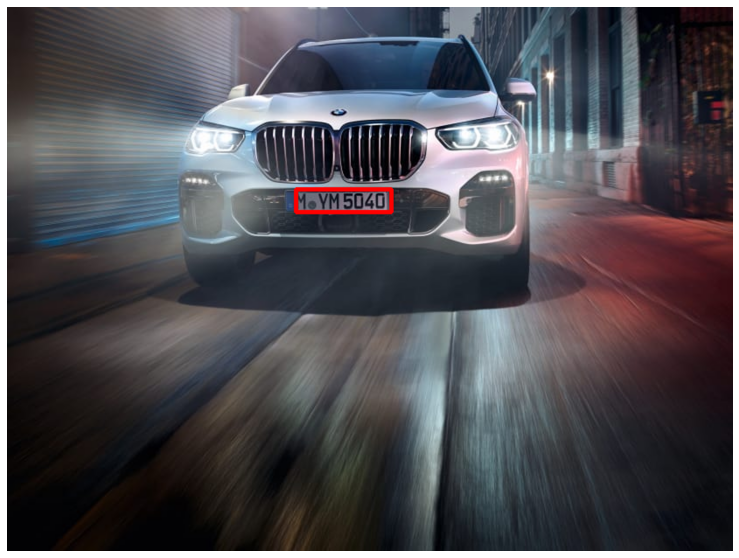

In [6]:
input_image = cv2.imread("car2.jpeg")
image = objectDetector(input_image)
height, width = image.shape[:2]
resized_image = cv2.resize(image,(5*width, 5*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

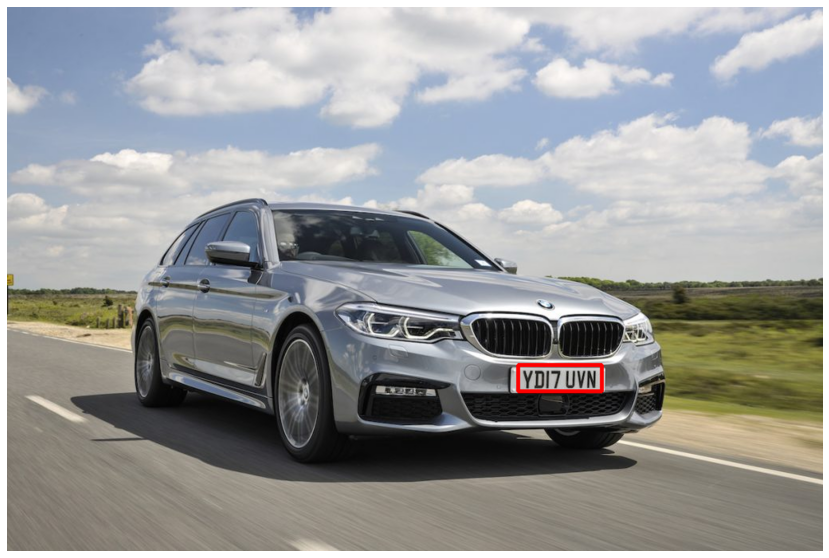

In [7]:
input_image = cv2.imread("car2.jpg")
image = objectDetector(input_image)
height, width = image.shape[:2]
resized_image = cv2.resize(image,(5*width, 5*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

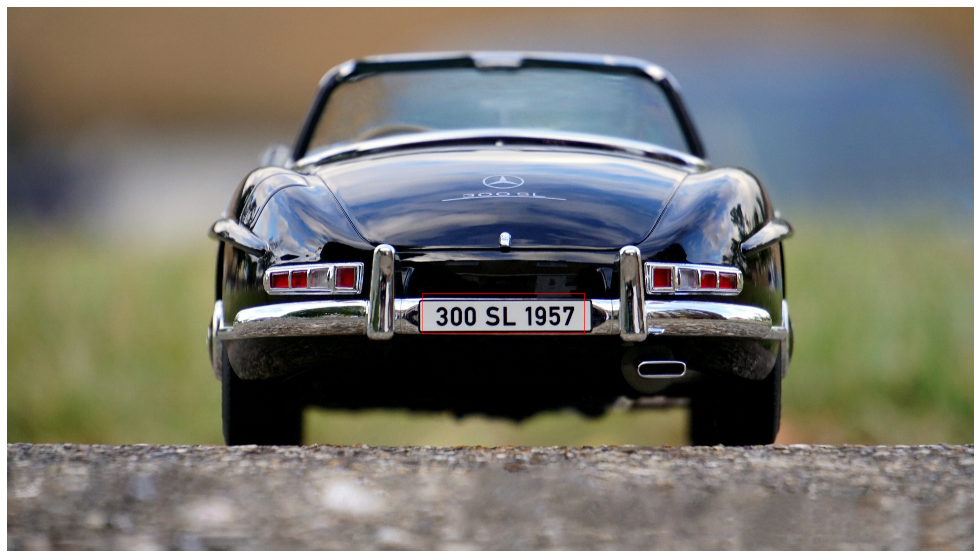

In [8]:
input_image = cv2.imread("car4.jpg")
image = objectDetector(input_image)
height, width = image.shape[:2]
resized_image = cv2.resize(image,(5*width, 5*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

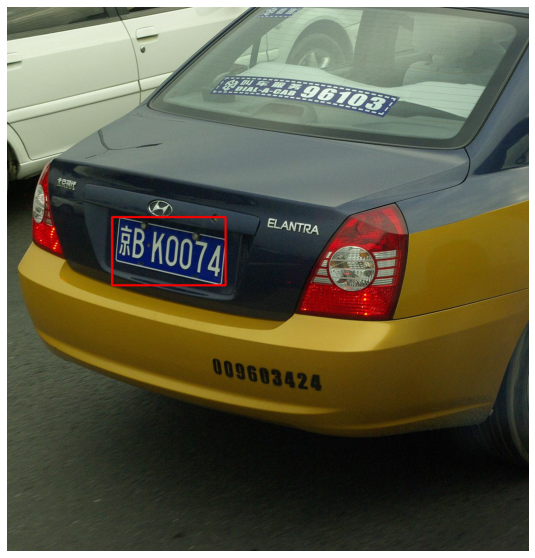

In [9]:
input_image = cv2.imread("car6.jpg")
image = objectDetector(input_image)
height, width = image.shape[:2]
resized_image = cv2.resize(image,(5*width, 5*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

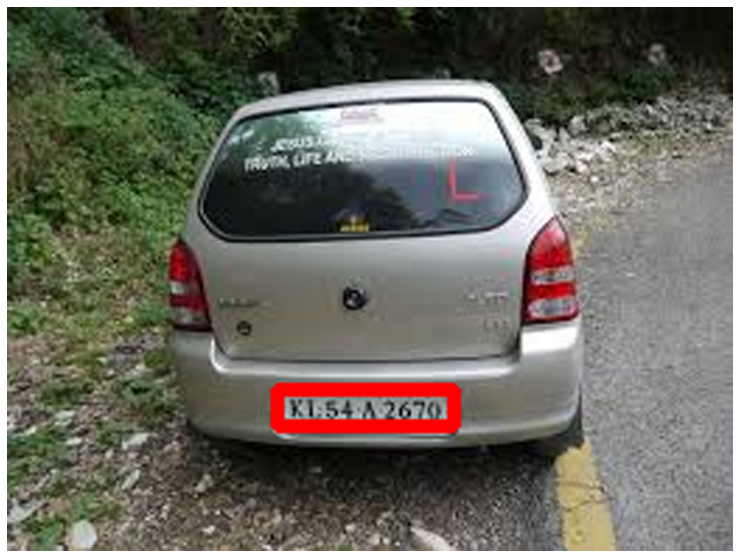

In [10]:
input_image = cv2.imread("4ocr.jpg")
image = objectDetector(input_image)
height, width = image.shape[:2]
resized_image = cv2.resize(image,(5*width, 5*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

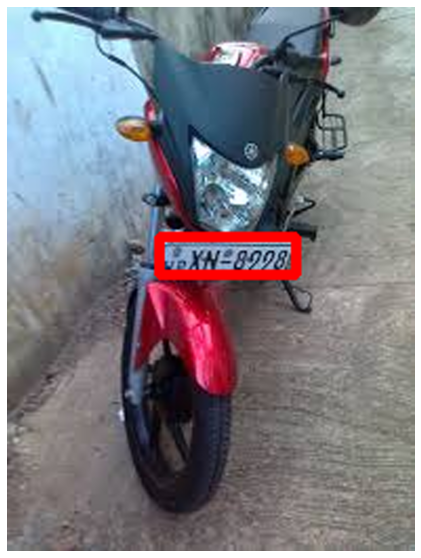

In [11]:
input_image = cv2.imread("5ocr.jpg")
image = objectDetector(input_image)
height, width = image.shape[:2]
resized_image = cv2.resize(image,(5*width, 5*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

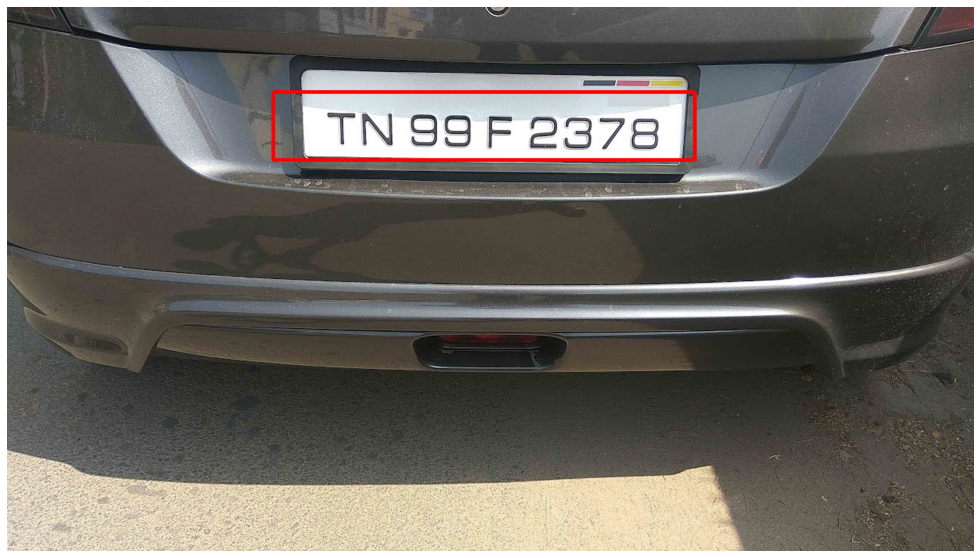

In [12]:
input_image = cv2.imread("b.jpg")
image = objectDetector(input_image)
height, width = image.shape[:2]
resized_image = cv2.resize(image,(5*width, 5*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()